In [69]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

### 1.a)

Registros con y1
520
Registros con y2
480


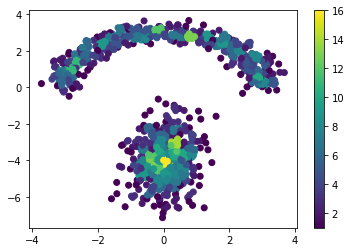

In [70]:
import numpy as np
import matplotlib.pyplot as plt
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)


print("Registros con y1")
print( len(y1) )
print("Registros con y2")
print( len(y2) )


equis=X[:,0]
ii=X[:,1]

hist, xedges, yedges = np.histogram2d(equis, ii,30)
xidx = np.clip(np.digitize(equis, xedges) - 1, 0, hist.shape[0] - 1)
yidx = np.clip(np.digitize(ii, yedges) - 1, 0, hist.shape[1] - 1)
c = hist[xidx, yidx]
plt.scatter(equis, ii, c=c)

plt.colorbar()
plt.show()


In [71]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

### 1.b)

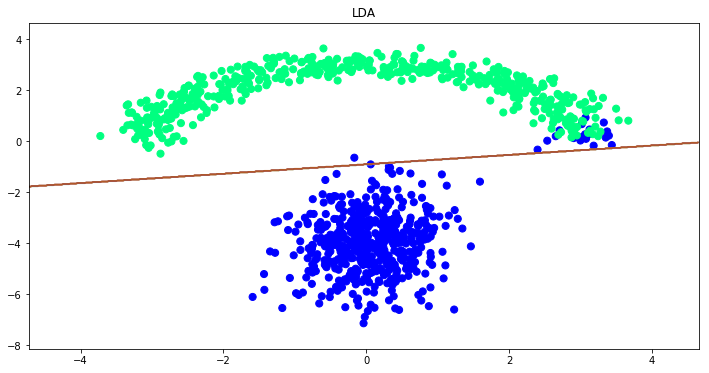

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(X,y)
visualize_border(model_LDA,X,y,"LDA")

Se puede observar la frontera que separa las calses. Ademas, la frontera se inclina hacia un lado debido a los datos que se les hizo el shifteo.

### 1.c)

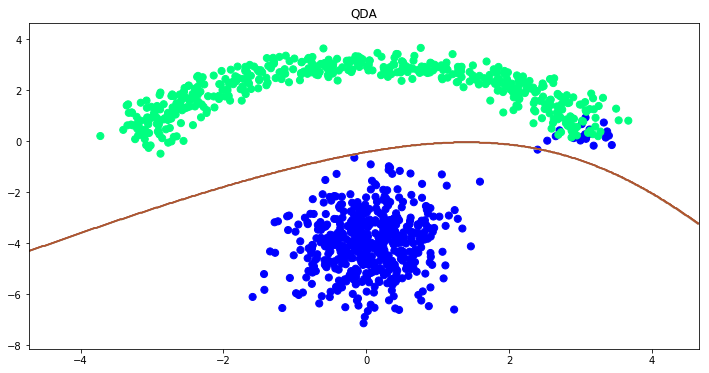

In [73]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_QDA = QDA()
model_QDA.fit(X,y)
visualize_border(model_QDA,X,y,"QDA")

Se puede ver que QDA, a diferencia de LDA, permite crear una curva en vez de una recta como frontera, aunque, de la misma forma que LDA, sufre una "atraccion" hacia los datos shifteados para generar ruido.

### 1.d)

In [74]:
from sklearn.metrics import accuracy_score
y_true = y
y_pred_LDA = model_LDA.predict(X)
y_pred_QDA = model_QDA.predict(X)
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_LDA)))
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_QDA)))

Miss Classification Loss: 0.021000
Miss Classification Loss: 0.019000


Se puede ver que el modelo LDA tiene mayor error de entrenamiento que el modelo QDA.

In [75]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

### 1.e)

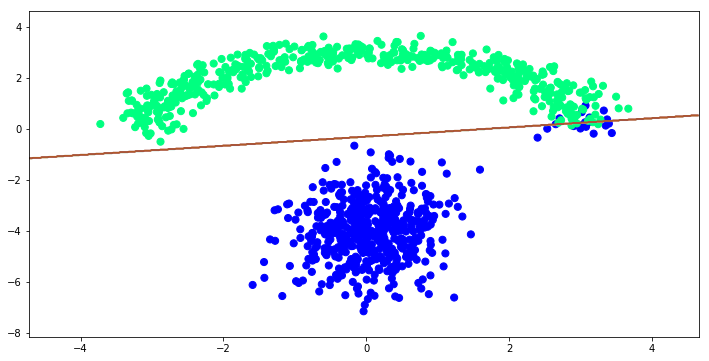

In [76]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Parametro c en model.set_param

C: Inversa de la fuerza de regularizacion  Tiene que ser flotante. Como en SVM, valores pequeños indican regularizacion mas fuerte.

UNa regularizacion mas debil hace que la frontera se vea "atraida" hacia los valores ruidos, mientras que una mas fuerte ignora este ruido, haciendo que la frontera quede en un estado mas vertical.

Hay que recordar que la frontera determinada por RL depende de todos los datos, por lo que remover datos del conjunto de entrenamiento podria afectar de gran manera la frontera 

### 1.f)

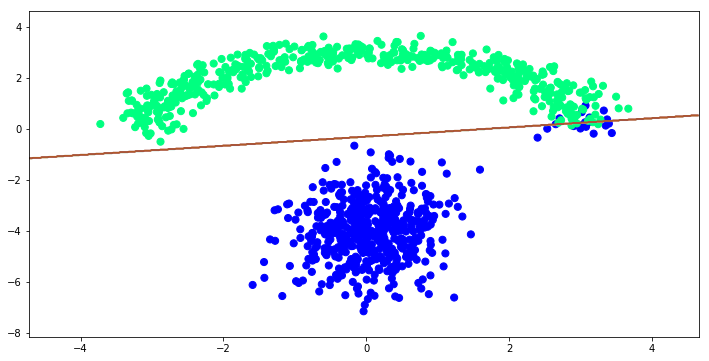

In [77]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

SE comporta de forma similar a regresion logistica.

Hay que recordar que SVM determina la frontera en base a los puntos que estan mas cerca del margen, por lo que  se podrian remover datos del conjunto de entrenamiento sin alterar la frontera.

### 1.g)

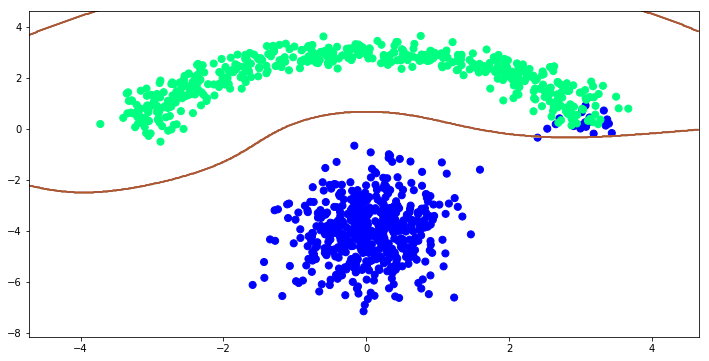

In [80]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 0.5 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Se puede ver que un C grande intentara rodear a los puntos de la clase 1 mientras que un C bajo intentara rodear a los puintos de clase 0

El parametro C define la complejidad de la frontera: un  C bajo hara la curva mas suave mientras que un C mas fuerte hara que la curva tenga mas libertad para tomar mas puntos como vectores de soporte, intentando clasificar todos los puntos como correctos.

El kernel RBF se define como

$\exp(-\gamma \|x-x'\|^2). \gamma$

Con $\gamma$ siendo por defecto 
$\frac{1}{n}$
donde $n$
es el numero de caracteristicas


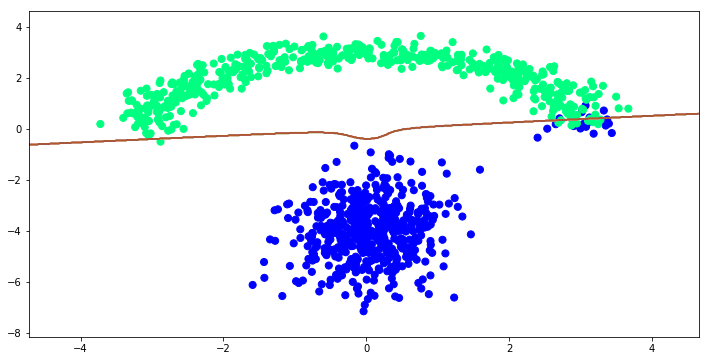

In [81]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.h)

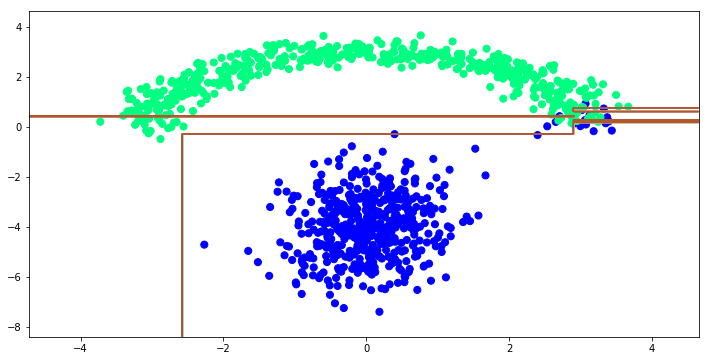

In [12]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.i)

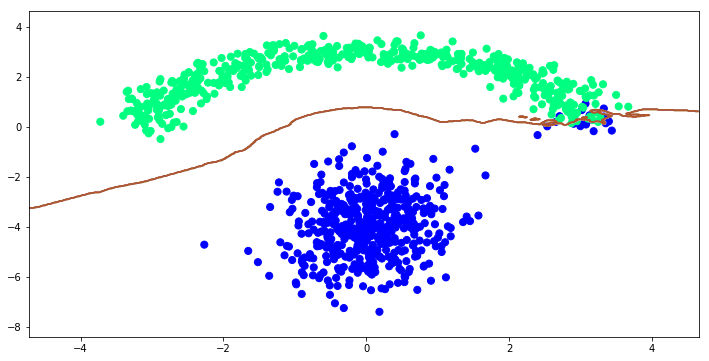

In [13]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

## 2

In [14]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

### 2.a)

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

print(df.head())
df.shape

  dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN


(176, 4)

### 2.b)

In [16]:
import os
os.getcwd()

'/home/nicomero/Escritorio/Maquinas de aprendizaje/tarea2maquinas'

In [17]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})#Aunlabelled no existe pero Aunlabelledtest si
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='heartbeat-sounds/set_a/') #MODIFICAR EL PATH A LA CARPETA CON LOS AUDIOS
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

### 2.c)

In [18]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
            1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
            2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
            0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

### 2.d)

In [19]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

### 2.e)

In [21]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values

X.shape


(176, 396900)

### 2.f)

In [21]:
X_fourier = np.abs(np.fft.fft(X))

MemoryError: 

## 3

### 3.a)

           tweet_id
count  4.000000e+04
mean   1.845184e+09
std    1.188579e+08
min    1.693956e+09
25%    1.751431e+09
50%    1.855443e+09
75%    1.962781e+09
max    1.966441e+09
(40000, 4)
     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...  


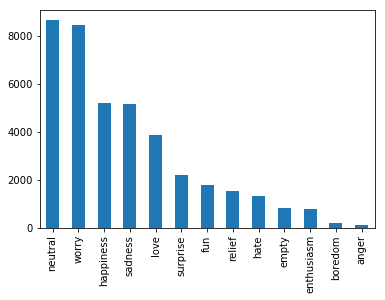

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('text_emotion.csv')
print(df.describe())
print(df.shape)
print(df.head())

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

df['author'].value_counts().head()
df['sentiment'].value_counts()

### 3.b)

In [55]:
import numpy as np


msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

print(df_train.shape)


print(df_test.shape)


(31959, 4)
(8041, 4)


### 3.c)

In [56]:
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

pd.options.mode.chained_assignment = None


nltk.download('stopwords')

def normalizar( df ):
    nltk.download('wordnet')
    #definir lemmatizer
    lemmatizer = WordNetLemmatizer()

    ##hay varios algoritmos de stemmer. 
    # http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
    #from nltk.stem.porter import PorterStemmer
    #stemmer = PorterStemmer()

    #descargar y definir stop words
    
    stop = stopwords.words('english')

    #minusculas
    df['content'] = df['content'].str.lower()     

    #remover puntuacion
    df['content'] = df['content'].str.replace('[^\w\s]',' ')   

    #remove stopwords
    df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))  

    #stemming or lematize
    df['content'] = df['content'].apply(lambda x : filter(None,x.split(" ")))
    df['content'] = df['content'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) #lematize
    #df['content'] = df['content'].apply(lambda x : [stemmer.stem(y) for y in x]) #stem
    df['content'] = df['content'].apply(lambda x : " ".join(x))
    return

normalizar(df_train)
normalizar(df_test)
df_train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nicomero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nicomero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nicomero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,tiffanylue know listenin bad habit earlier sta...
1,1956967666,sadness,wannamama,layin n bed headache ughhhh waitin call
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,want hang friend soon
4,1956968416,neutral,xkilljoyx,dannycastillo want trade someone houston ticke...


### 3.d)

In [57]:
traduccion = {"neutral":1, "worry":-1, "happiness":1, "sadness":-1
             ,"love":1, "surprise":1, "fun":1, "relief":1
             ,"hate":-1, "empty":-1, "enthusiasm":1, "boredom":-1
             ,"anger":-1}


df_train['binarySent']=df_train['sentiment'].replace(traduccion)
df_test['binarySent']=df_test['sentiment'].replace(traduccion)
print(df_train.head())
print(df_test.head())

     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  binarySent  
0  tiffanylue know listenin bad habit earlier sta...          -1  
1            layin n bed headache ughhhh waitin call          -1  
2                     funeral ceremony gloomy friday          -1  
3                              want hang friend soon           1  
4  dannycastillo want trade someone houston ticke...           1  
      tweet_id sentiment        author  \
7   1956968636     worry      mcsleazy   
8   1956969035   sadness   nic0lepaula   
11  1956969531     worry  dudeitsmanda   
15  1956971077   sadness        Sim_34   
25  1956972444     worry    jomama6881   

                                              content  binarySent  
7                       

### 3.e)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trainBag = vectorizer.fit_transform(df_train['content'])
testBag = vectorizer.transform(df_test['content'])
#(tweet,palabra)
print(testBag)

  (0, 38012)	0.552247274582
  (0, 16192)	0.350628790839
  (0, 15830)	0.654912061274
  (0, 8013)	0.378381541237
  (1, 23023)	0.751822406877
  (1, 21121)	0.659365656155
  (2, 28946)	0.72065538606
  (2, 7387)	0.693293454853
  (3, 32814)	0.568256319673
  (3, 14389)	0.438954760014
  (3, 11444)	0.695991001244
  (4, 37104)	0.195621963465
  (4, 36036)	0.402665446434
  (4, 33656)	0.256698101522
  (4, 25413)	0.22045872573
  (4, 15942)	0.17468807768
  (4, 14187)	0.209237698049
  (4, 14157)	0.387376995868
  (4, 12622)	0.182002542221
  (4, 10865)	0.272580358983
  (4, 9546)	0.286114727767
  (4, 9131)	0.22278220966
  (4, 9048)	0.279097562922
  (4, 6099)	0.275053767398
  (4, 5463)	0.26128680111
  :	:
  (8037, 19052)	0.230552747592
  (8037, 15975)	0.337153276029
  (8037, 12058)	0.40837550316
  (8037, 3011)	0.309600757527
  (8038, 26942)	0.307948284768
  (8038, 20623)	0.365423070705
  (8038, 19321)	0.574956552042
  (8038, 14218)	0.332390974356
  (8038, 10072)	0.574956552042
  (8039, 33825)	0.84710660151

### 3.f)

In [59]:
raw_data = {'tipo': ['Multi Naive', 'LDA', 'QDA', 'Reg', 'SVM', 'Tree'],
        'train_score': [],
        'test_score': []}

#### Multinomial Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

multibayes = MultinomialNB()
multibayes.fit(trainBag, df_train['binarySent'])

Res_train = multibayes.predict(trainBag)
Res_test = multibayes.predict(testBag)

scoreTrain = accuracy_score(df_train['binarySent'], Res_train)
scoreTest = accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)


#### LDA

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(trainBag, df_train['binarySent'])

Res_train = lda.predict(trainBag)
Res_test = lda.predict(testBag)

scoreTrain = accuracy_score(df_train['binarySent'], Res_train)
scoreTest = accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

#### QDA

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

qda = QuadraticDiscriminantAnalysis()
qda.fit(trainBag, df_train['binarySent'])

Res_train = qda.predict(trainBag)
Res_test = qda.predict(testBag)

scoreTrain = accuracy_score(df_train['binarySent'], Res_train)
scoreTest = accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

#### Regresion logistica

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

model_LDA = LDA()
model_LDA.fit(trainBag, df_train['binarySent'])

Res_train = model_LDA.predict(trainBag)
Res_test = model_LDA.predict(testBag)


scoreTrain = accuracy_score(df_train['binarySent'], Res_train)
scoreTest = accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

#### SVM

In [64]:
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score

modelSVM= SVM()
modelSVM.fit(trainBag, df_train['binarySent'])

Res_train = modelSVM.predict(trainBag)
Res_test = modelSVM.predict(testBag)

scoreTrain = accuracy_score(df_train['binarySent'], Res_train)
scoreTest = accuracy_score(df_test['binarySent'], Res_test)

raw_data['train_score'].append(scoreTrain)
raw_data['test_score'].append(scoreTest)

#### Grafico

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datos = pd.DataFrame(raw_data, columns = ['tipo', 'train_score', 'test_score'])

# Setting the positions and width for the bars
pos = list(range(len(datos['train_score']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        datos['pre_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=datos['first_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        datos['mid_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=datos['first_name'][1]) 


# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(datos['first_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(datos['pre_score'] + datos['mid_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score'], loc='upper left')
plt.grid()
plt.show()

### 3.g)